In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp

Steady-state height is 15.041760315288816 mm


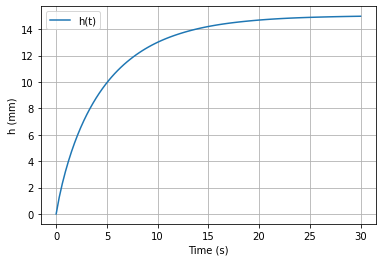

In [46]:
# Data
Qin = 8 * 10**(4)  # mm³/s
fv = 0.3
d_ifp = 25 # mm
d_i = 140 # mm
g = 9810  # mm/s²
h_max = 630 # mm

def h(t, h, Qin, fv, d_ifp, di, g, h_max):
    if h <= h_max:
        dhdt = (Qin - (1/4) * fv * np.pi * (d_ifp)**2 * np.sqrt(2 * g * h)) / ((1/4) * np.pi * d_i**2)
    else: 
        dhdt = 0
    return dhdt

# Initial value
h0 = [0]

# Time span
t = np.linspace(0, 30, 100)
t_span = (t[0], t[-1])

# Solve the differential equation
sol = solve_ivp(h, t_span, h0, args=(Qin, fv, d_ifp, d_i, g, h_max), t_eval=t)

if fv !=0:
    h_steady_state = (8/g)*(Qin/(fv*np.pi*(d_ifp)**2))**2
    print(f"Steady-state height is {h_steady_state} mm")
else:
    print(f"No steady-state")

# Plot results
plt.plot(sol.t, sol.y[0], label="h(t)")
plt.xlabel("Time (s)")
plt.ylabel("h (mm)")
plt.grid()
plt.legend()
plt.show()